# Massive OB star clusters in Cassiopea

#### You can access the research note on this project here: https://iopscience.iop.org/article/10.3847/2515-5172/ad3247

Our goal in this code is to create a plot that illustrates the star density distribution in the Cassiopea region. 

To do that, we import the necessary libraries first. Dustmaps work in this code even though there is a warning message about the file below. If some of the libraries are not found, you might need to install them on your computer using pip in the terminal. I prefer querying Gaia separately and then downloading the file, but there is also a way to search the database using Python. You can find all the files that are needed to run this code on the GitHub page for this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.coordinates import ICRS, Galactic, Galactocentric
import astropy.units as u
from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde
import math
import astropy.units as units
import random
from dustmaps.bayestar import BayestarWebQuery

dir = 'Documents/lehigh/Clusters_Research/' #here you specify the location of your files that you will use, such as Gaia data

Configuration file not found:

    /Users/kate/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


Here, I split the region of interest into two Gaia queries due to the time run issue I have with the Gaia database. If your computer allows you to get just one file, then it might be less coding. You can also specify the coordinates of interest in the code for the file with a broad search data instead of doing a search in Gaia over and over again.

In [2]:
df = pd.read_csv(dir+'OB[114,132].csv') #converting to dataframe
gal = df.values
l, latitude, dist, p, ra, dec = gal[:, 11], gal[:, 12], gal[:, 24], gal[:, 3], gal[:, 1], gal[:, 2]

count = []
peak_l = []
peak_d = []
peak_b = []

#pick the stars from the region of interest if needed. The longitudes were specified in the Gaia search
for a, b, c in zip(l, latitude, dist):
        if c < 3000 + 5*50 and c > 1200 + 5*50 and b > -4 and b < 4:
            peak_l.append((a/360)*2*math.pi)
            peak_d.append(c)
            peak_b.append(b)

df=pd.read_csv(dir+'OB[105,117].csv')
gal = df.values
l, latitude, dist, pmra, pmdec, alpha, decl = gal[:, 11], gal[:, 12], gal[:, 24], gal[:, 4], gal[:, 5], gal[:, 1], gal[:, 2]
print(l)

ra = []
dec = []
distance = []

for a, b, c, d, e in zip(l, latitude, dist, alpha, decl):
        if c < 3000 + 5*50 and c > 1200 + 5*50 and b > -4 and b < 4 and a < 114:
            peak_l.append((a/360)*2*math.pi)
            peak_d.append(c)
            distance.append(c)
            ra.append(d)
            dec.append(e)
            peak_b.append(b)

#Previously known candidates that we plot later
df1=pd.read_csv(dir+'Candidates_Cas_OB4.csv')
ob7=pd.read_csv(dir+'Candidates_Cas_OB7.csv')
ob5 = pd.read_csv(dir+'Candidates_Cas_OB5.csv')
ob8 = pd.read_csv(dir+'Candidates_Cas_OB8.csv')

#This is an alternative way of converting the arrays we got from the table to the needed format but the way above using df.values might be faster
llist4=df1['l'].tolist()
dlist4=df1['d'].tolist()
llist7=ob7['l'].tolist()
dlist7=ob7['d'].tolist()

llist5=ob5['l'].tolist()
dlist5=ob5['d'].tolist()
llist8=ob8['l'].tolist()
dlist8=ob8['d'].tolist()
vr8 = ob8['vr'].tolist()
vt8 = ob8['vr'].tolist()

alll = []
all4 = []
all7 = []
all5 = []
all8 = []
alld = []


for i in llist4:
    i = (i/360)*2*math.pi
    all4.append(i)
for i in llist7:
    i = (i/360)*2*math.pi
    all7.append(i)   
for i in llist5:
    i = (i/360)*2*math.pi
    all5.append(i)  
for i in llist8:
    i = (i/360)*2*math.pi
    all8.append(i)

[115.223501 115.2183565 115.2405353 ... 108.4908319 108.5355572
 108.5368982]


 This cell caclulares a kernel-density estimate using Gaussian kernels, and we use it as a third variable in our plot later. You can learn more about how kde package works here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

#### The next cell might take around 5 minutes to compile! 
If you can find a faster way that would safe a lot of time and nerves. Otherwise I suggest using it as a study break 

In [3]:
df = pd.read_csv(dir+'OB[114,132].csv')
gal = df.values
l, latitude, dist, p, ra, dec = gal[:, 11], gal[:, 12], gal[:, 24], gal[:, 3], gal[:, 1], gal[:, 2]

count = []
peak_l = []
peak_d = []
peak_b = []

for a, b, c in zip(l, latitude, dist):
        if c < 3200 + 5*50 and c > 1200 + 5*50 and b > -4 and b < 4:
            peak_l.append((a/360)*2*math.pi)
            peak_d.append(c)
            peak_b.append(b)

df=pd.read_csv(dir+'OB[105,117].csv')
gal = df.values
l, latitude, dist, pmra, pmdec, alpha, decl = gal[:, 11], gal[:, 12], gal[:, 24], gal[:, 4], gal[:, 5], gal[:, 1], gal[:, 2]
print(l)

ra = []
dec = []
distance = []

for a, b, c, d, e in zip(l, latitude, dist, alpha, decl):
        if c < 3200 + 5*50 and c > 1200 + 5*50 and b > -4 and b < 4 and a < 114:
            peak_l.append((a/360)*2*math.pi)
            peak_d.append(c)
            distance.append(c)
            ra.append(d)
            dec.append(e)
            peak_b.append(b)
            
xy = np.vstack([peak_l,peak_d])
z = gaussian_kde(xy)(xy)

[115.223501 115.2183565 115.2405353 ... 108.4908319 108.5355572
 108.5368982]


 Here we check that the calculated velocities have correct orientation. When we plot the velocities in polar plot, Python still plots them as if the plot was still in x,y coordinate system. That is why we recalculate the values so they are plotted correctly.

48.8334212309225 -28.966133638108587 60.384903349104725


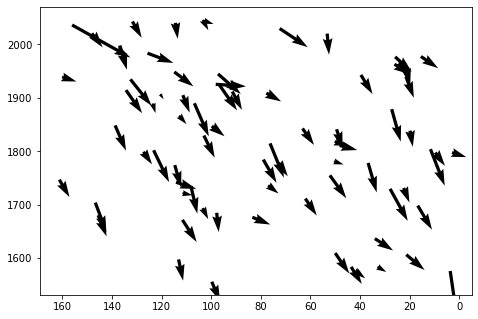

In [4]:
df=pd.read_csv(dir+'OB[114,132].csv')
gal = df.values

l, latitude, dist, p, ra, dec = gal[:, 11], gal[:, 12], gal[:, 24], gal[:, 3], gal[:, 1], gal[:, 2]
v_r, pm= gal[:, 9], gal[:, 29]

df2=pd.read_csv(dir+'OB[105,117].csv')
gal2 = df2.values

l2, latitude2, dist2, p2, ra2, dec2 = gal2[:, 11], gal2[:, 12], gal2[:, 24], gal2[:, 3], gal2[:, 1], gal2[:, 2]
v_r2, pm2= gal2[:, 9], gal2[:, 29]

v_tan = []
v_rad = []
angle = []
vel_l = []
vel_d = []

#recalculating the velocities to plot them in polar coordinates
for a, b, c, e in zip(pm, dist, v_r, l):
    if (c < 0 and e > 116.5 and e < 118 and b >2750 and b < 3250) or (c < 0 and b >2500 and b < 3250 and e > 126):
        vt = 4.74*a*b/1000
        #print(c, vt)
        v_tot = math.sqrt(c*c + vt*vt)
        vel_l.append((e/360)*2*math.pi) #converted l to rads
        vel_d.append(b)
        long = (e/360)*2*math.pi
        thetha = math.atan(-c/(vt))
        phi = long - math.pi/2 - thetha
        v_rad.append((v_tot*math.sin(phi)))
        v_tan.append((v_tot*math.cos(phi)))
    
fig = plt.figure()    
ax = fig.add_axes([1, 1, 1, 1])
ax.invert_xaxis()

av_r, av_tan, tot = 0, 0, 0
n = 0

#same for another region
for a, b, c, e in zip(pm2, dist2, v_r2, l2):
    if  (c < 0 and b >1550 and b < 2050 and e > 111 and e < 117):
        vt = 4.74*a*b/1000
        #print(c, vt)
        v_tot = math.sqrt(c*c + vt*vt)
        tot = tot + math.sqrt(c*c + vt*vt)
        vel_l.append((e/360)*2*math.pi) #converted l to rads
        vel_d.append(b)
        long = (e/360)*2*math.pi
        thetha = math.atan(-c/(vt))
        phi = long - math.pi/2 - thetha
        v_rad.append((v_tot*math.sin(phi)))
        v_tan.append((v_tot*math.cos(phi)))
        xlabel = (e-111)*30
        plt.quiver(xlabel, b, vt, c, scale = 1150)
        #plt.quiver(e, b, vt, c)
        av_r = av_r + (v_tot*math.sin(phi))
        av_tan = av_tan + (v_tot*math.cos(phi))
        n = n + 1
        
y_av = av_r/n
x_av = av_tan/n
tot_av = tot/n

print(x_av, y_av, tot_av)#average values
          
#print(v_tan)
#print(v_rad)

Now we collect the reddening data through Bayestar:

In [5]:
bayestar = BayestarWebQuery()
coords = SkyCoord(peak_l*units.deg, peak_b*units.deg, peak_d*units.pc, frame='galactic')
reddening1 = bayestar(coords, mode='percentile', pct=90.)

In [6]:
new_dist = []

#now we create another array to find the gradient of the reddening
for i in peak_d:
    new_dist.append(i - 20)
    
coords2 = SkyCoord(peak_l*units.deg, peak_b*units.deg, distance=new_dist*units.pc, frame='galactic')
reddening2 = bayestar(coords2, mode='percentile', pct=90.)

z2 = reddening1 - reddening2 #gradient value

In [7]:
newl, newd, newred = [], [], []

for a, b, c in zip(peak_l, peak_d, z2):
    if c > 0.09:
        newl.append(a)
        newd.append(b)
        newred.append(c)

print(max(newl)) 

2.3033921158165978


To plot the gradient we use the following function:

In [8]:
from scipy import stats
def density_estimation(m1, m2):
    X, Y = np.mgrid[1.8327:2.30339:100j, 1500:3400:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

X, Y, Z = density_estimation(newl, newd)


Add Cas OB2 data:

In [9]:
df1=pd.read_csv(dir+'Cas OB2_candidates.csv')
gal1 = df1.values
l2, p2 = gal1[:, 12], gal1[:, 4]

all2 = []

for i in l2:
    i = (i/360)*2*math.pi
    all2.append(i)

dlist2 =[]
for i in p2:
    i = 1000/i
    dlist2.append(i)

/var/folders/5x/3wg3q4z523q9mf6s8yfz6c3c0000gn/T/ipykernel_35873/421977886.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0', '100',  '200', '300', '400', '500', '600', '700', '800'])
/var/folders/5x/3wg3q4z523q9mf6s8yfz6c3c0000gn/T/ipykernel_35873/421977886.py:42: UserWarning: The following kwargs were not used by contour: 'label', 'linewidth'
  ax3.contour(X, Y, Z, 8, cmap = 'inferno', label = 'reddening regions', linewidth = 50) #plasma, Reds


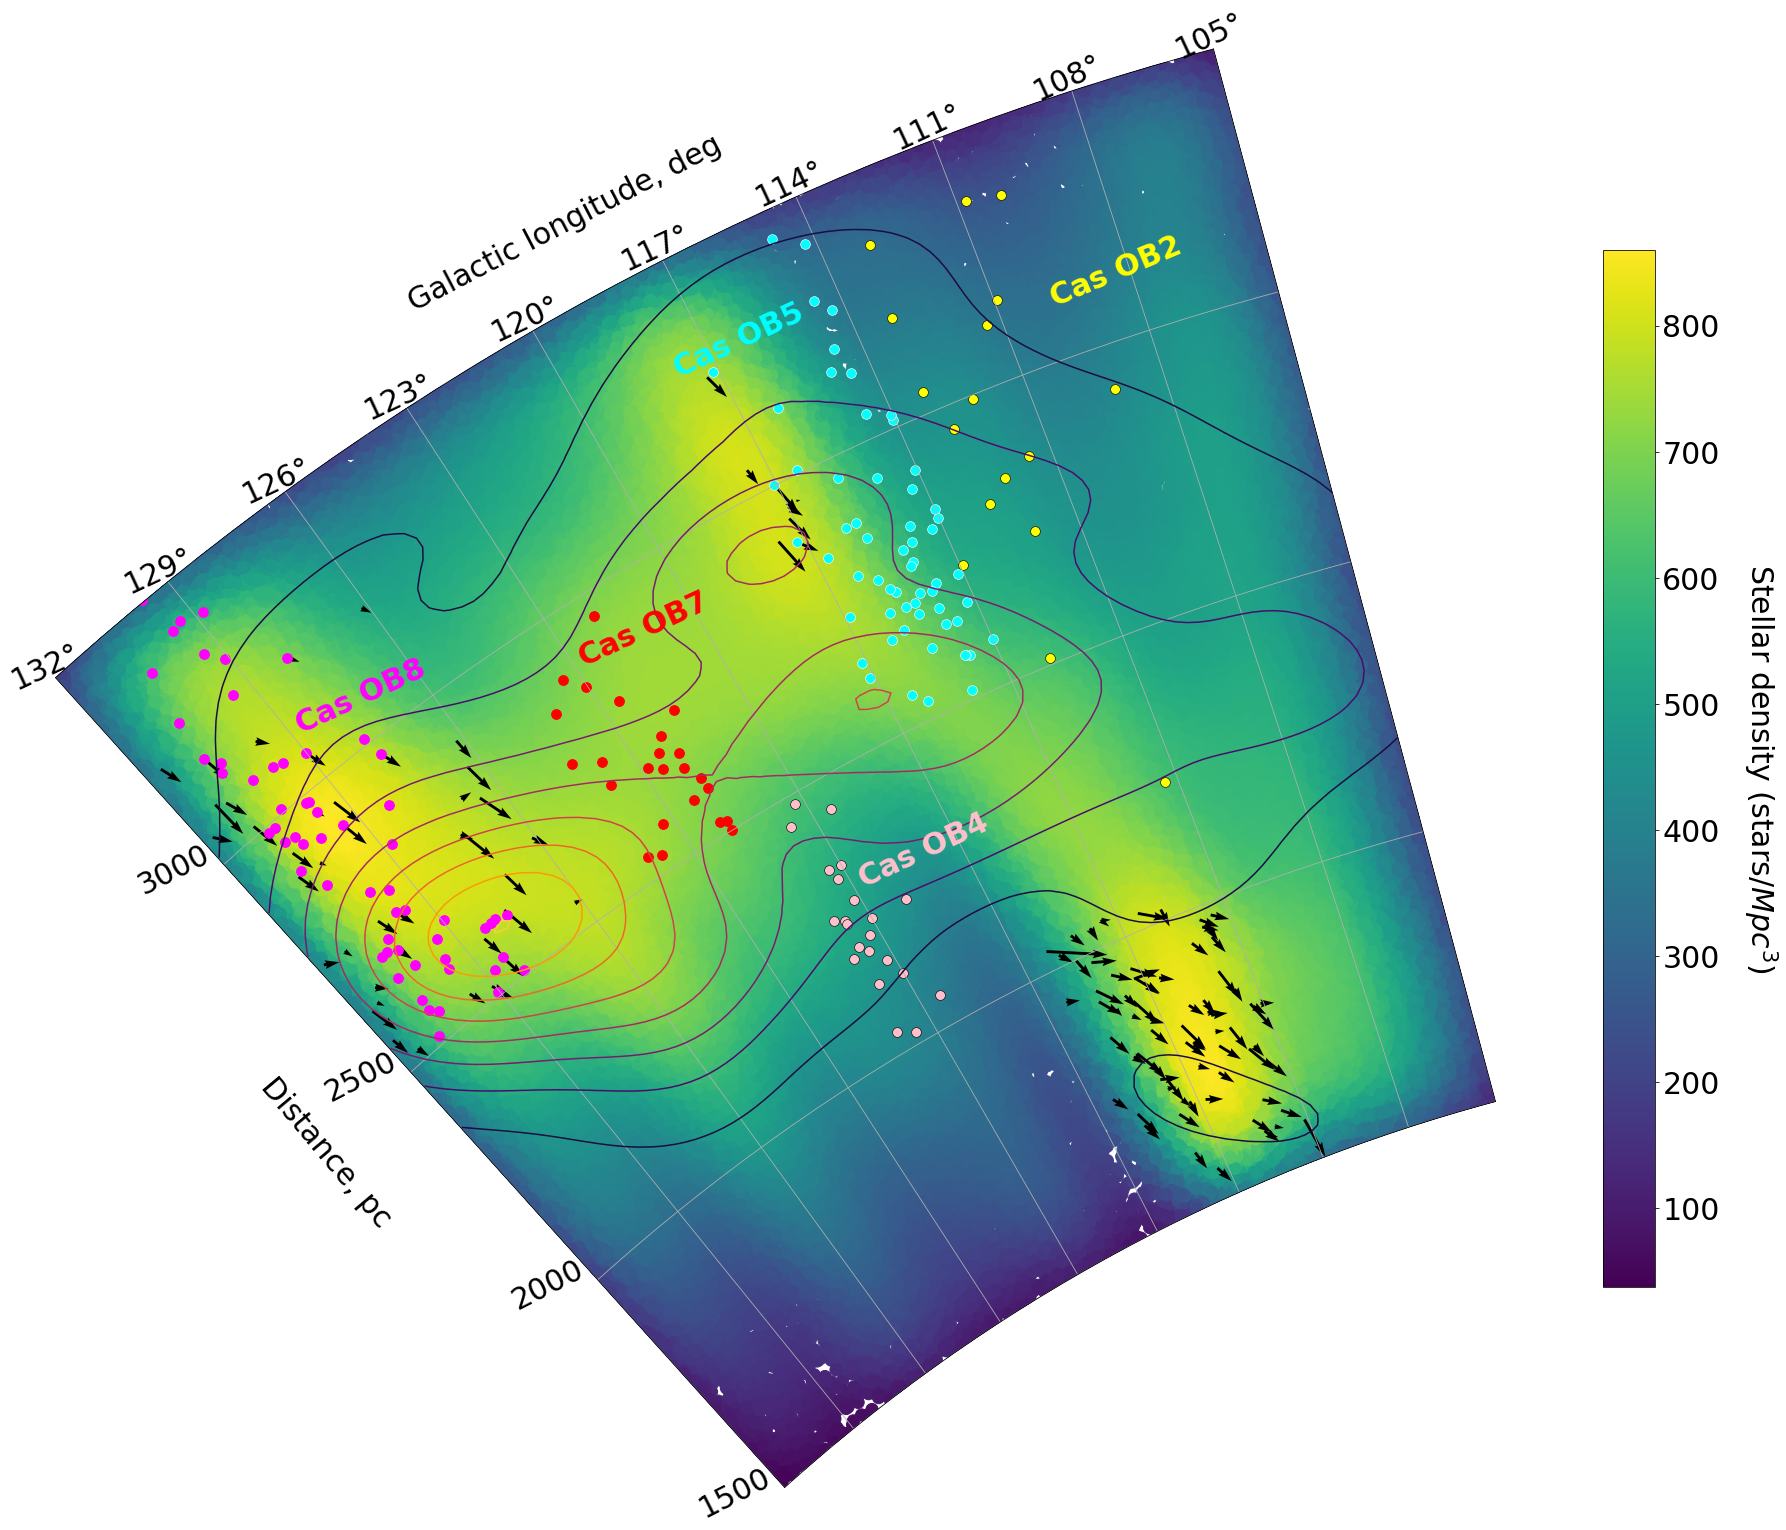

In [10]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)

def setup_axes1(fig, rect):
   
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 100, 0, 100))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    return ax1, aux_ax

fig = plt.figure()    
ax3 = fig.add_axes([0.05, 0.4, 5, 5], projection = 'polar')
#ax3 = fig.add_subplot(111, polar=True)
#ax1, ax3 = setup_axes1(fig, 111)
density = ax3.scatter(peak_l, peak_d, c=z, s = 150) #the main gradient plot
cbar = fig.colorbar(density, shrink=0.72) #reddening
cbar.ax.get_yaxis().labelpad = 60
cbar.ax.set_ylabel('Stellar density (stars/$Mpc^3$)', rotation=270, fontsize = 30)
cbar.ax.tick_params(labelsize=30, rotation = 0)
cbar.ax.set_yticklabels(['0', '100',  '200', '300', '400', '500', '600', '700', '800']) 
#ax3.scatter(all4, dlist4, color = 'orange', s = 15)
#ax3.scatter(all2, dlist2, color = 'red', s = 15)
#ax3.scatter(all7, dlist7, color = 'red', s = 15)
#ax3.scatter(all5, dlist5, color = 'blue', s = 15)
#ax3.scatter(all8, dlist8, color = 'purple', s = 15)
ax3.quiver(vel_l, vel_d, v_tan, v_rad, width = 0.002, scale=4200, label = 'Motion of OB stars in the region')
ax3.contour(X, Y, Z, 8, cmap = 'inferno', label = 'reddening regions', linewidth = 50) #plasma, Reds
#ax3.quiver(1.98, 1850, x_av, y_av, color = 'red')
ax3.set_thetamin(105)
ax3.set_thetamax(132)
ax3.set_rorigin(-1600)
ax3.set_rmin(1500)
ax3.set_rmax(3450)
ax3.set_rlabel_position(120)

df1=pd.read_csv(dir+'Candidates_Cas_OB4.csv')
ob7=pd.read_csv(dir+'Candidates_Cas_OB7.csv')
ob5 = pd.read_csv(dir+'Candidates_Cas_OB5.csv')
ob8 = pd.read_csv(dir+'Candidates_Cas_OB8.csv')


llist4=df1['l'].tolist()
dlist4=df1['d'].tolist()
llist7=ob7['l'].tolist()
dlist7=ob7['d'].tolist()

llist5=ob5['l'].tolist()
dlist5=ob5['d'].tolist()
llist8=ob8['l'].tolist()
dlist8=ob8['d'].tolist()
vr8 = ob8['vr'].tolist()
vt8 = ob8['vr'].tolist()

alll = []
all4 = []
all7 = []
all5 = []
all8 = []
alld = []

for i in llist4:
    i = (i/360)*2*math.pi
    all4.append(i)
for i in llist7:
    i = (i/360)*2*math.pi
    all7.append(i)   
for i in llist5:
    i = (i/360)*2*math.pi
    all5.append(i)  
for i in llist8:
    i = (i/360)*2*math.pi
    all8.append(i)
    
#ax3.scatter(alll, alld, s = 35, color = 'white',edgecolors='black',linewidth=0.6, label = 'All known OB type stars' )
ax3.scatter(all4, dlist4, color = 'pink', s = 95, edgecolors='black',linewidth=0.6, label = 'Cas OB4')
ax3.scatter(all2, dlist2, color = 'yellow', s = 95, edgecolors='black', linewidth=0.6, label = 'Cas OB2')
ax3.scatter(all7, dlist7, color = 'red', s = 95, label = 'Cas OB7')
ax3.scatter(all5, dlist5, color = 'aqua', s = 95,edgecolors='white', linewidth=0.6, label = 'Cas OB5')
ax3.scatter(all8, dlist8, color = 'magenta', s = 95, label = 'Cas OB8')
ax3.set_rgrids([1500,2000, 2500, 3000])
ax3.set_thetamax(105)
ax3.set_thetamin(132)
ax3.set_rorigin(-1600)
ax3.set_rmin(1500)
ax3.set_rmax(3450)
ax3.set_rlabel_position(-120)
ax3.text((120/180)*np.pi, 2300, 'Cas OB4', fontsize = 30, color = 'pink', fontweight ='bold', rotation=25)
ax3.text((129/180)*np.pi, 3100, 'Cas OB8', fontsize = 30, color = 'magenta', fontweight ='bold', rotation=25)
ax3.text((123/180)*np.pi, 2900, 'Cas OB7', fontsize = 30, color = 'red', fontweight ='bold', rotation=25)
ax3.text((118/180)*np.pi, 3260, 'Cas OB5', fontsize = 30, color = 'aqua', fontweight ='bold', rotation=25)
ax3.text((110/180)*np.pi, 3100, 'Cas OB2', fontsize = 30, color = 'yellow', fontweight ='bold', rotation=23)

ax3.text((122/180)*np.pi, 3600, 'Galactic longitude, deg', fontsize = 30, rotation=27.5)
ax3.text((137.5/180)*np.pi, 2500, 'Distance, pc', fontsize = 30, rotation=-50)

ax3.xaxis.set_tick_params(labelsize=30, rotation=25)
ax3.yaxis.set_tick_params(labelsize=30, rotation=27, pad = -90)
#ax3.yaxis.tick_right()

ax3.grid(True)

#plt.legend(prop = { "size": 20 }, loc = "lower left")

I suggest rotating this plot in other software such as Canva in case there is a need to use it in a poster. 

Density of a number of stars is estimaned for several regions below, and by changing the region of the interest in the code we can probe different colors that correspond to densities that we used in the colorbar above. This is because the function that we used to plot the gradient does not calculate the density directly and we need to estimate the values corresponding to each color ourselves. 

In [11]:
n = 0
for a, b, c in zip(peak_l, peak_d, peak_b):
    if a < np.pi*129.5/180 and a > np.pi*128.5/180 and b < 3000 and b > 2950:
        n = n + 1
vol = 50*np.sin(np.pi*1/180)*2975*4*np.sin(np.pi*1/180)*2975 #galactic latitude foes from -2 to 2 degrees
#print(vol)
print(10**6*n/vol) #number of stars in a cube with a side of 100 pc

n = 0
for a, b, c in zip(peak_l, peak_d, peak_b):
    if a > np.pi*113/180 and a < np.pi*114/180 and b < 2000 and b > 1965:
        n = n + 1
vol = 35*np.sin(np.pi*1/180)*1980*4*np.sin(np.pi*1/180)*1980
print(1000000*n/vol)


n=0
for a, b, c in zip(peak_l, peak_d, peak_b):
    if a < np.pi*129/180 and a > np.pi*127/180 and b < 1550 and b > 1500:
        n = n + 1
vol = 50*np.sin(np.pi*1/180)*1525*4*np.sin(np.pi*1/180)*1525*2
print(1000000*n/vol) #blue region


350.5477884277013
801.5594623901733
169.40683233043438


 Now we perform the query for the V/125 catalog to compare if the regions with higher densities match with the plot we obtained. 

In [12]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

result = Vizier.get_catalogs("V/125")

table = result[0]
print (table)


ob_l = table['GLON']
ob_l = table['GLON']
names = table['Name']

query_list = []


for a, b in zip(ob_l, names):
    if a > 105 and a < 132:
        query_list.append(b)
        
def remove(string):
    return string.replace(" ", "")

list2 = []
for i in query_list:
    list2.append(remove(i))
    
from astroquery.simbad import Simbad

Simbad.add_votable_fields('plx')


limitedSimbad = Simbad()
limitedSimbad.ROW_LIMIT = 1

result_table = Simbad.query_objects(list2, wildcard=True)

#for i in list2:
  #  result_table = Simbad.query_object(i, wildcard=True)
   # print(result_table)
    

print(result_table)


parallax = result_table['PLX_VALUE']
RA = result_table['RA']
print(RA)
DEC = result_table['DEC']
N = len(result_table)

 ALS          Name         mag  n_mag ...  DEJ2000    GLON     GLAT   Simbad
                           mag        ...             deg      deg          
----- ------------------- ----- ----- ... --------- -------- -------- ------
13354      LS   I +63  26  12.4     P ... +63 54 29   117.32     1.60 Simbad
18110 AA 17, 253, No. 210  11.5     P ... +62 17 39   117.01     0.01 Simbad
13355      LS   I +61 118  11.4     V ... +62 08 07   116.98    -0.14 Simbad
18109 AA 17, 253, No. 209  11.3     P ... +63 20 08   117.23     1.03 Simbad
13356      LS   I +63  27  13.2     P ... +63 47 35   117.33     1.48 Simbad
13357      LS   I +62  56  11.5     V ... +62 39 46   117.11     0.37 Simbad
  ...                 ...   ...   ... ...       ...      ...      ...    ...
13349      LS   I +61 117  11.0     V ... +61 28 27   116.80    -0.78 Simbad
13350      LS   I +58   7   9.2     V ... +59 12 31   116.35    -3.00 Simbad
15071             HR 9076   4.5     V ... -65 34 38   311.30   -50.71 Simbad

/Users/kate/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 4 raised an error (recorded in the `errors` attribute of the result table): 'AA17,253,No.210': No known catalog could be found 
  warnings.warn("Warning: The script line number %i raised "
/Users/kate/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 10 raised an error (recorded in the `errors` attribute of the result table): 'AA17,253,No.215': No known catalog could be found 
  warnings.warn("Warning: The script line number %i raised "
/Users/kate/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 48 raised an error (recorded in the `errors` attribute of the result table): 'AA17,253,No.247': No known catalog could be found 
  warnings.warn("Warning: The script line number %i raised "
/Users/kate/opt/anaconda3/lib/python3.9/s

 Convert to galactocentric coordinates: 

In [13]:
sc = SkyCoord(ra=RA[0:N-1], dec=DEC[0:N-1], distance = 1000/abs(parallax[0:N-1]), unit=(u.hourangle, u.deg, u.pc))

gcl = sc.transform_to(Galactic)
print (gcl)

df = pd.DataFrame({"l": gcl.l, "b": gcl.b, "dist": gcl.distance})
gal = df.values
l, b, dist =gal[:, 0], gal[:, 1], gal[:, 2]
print(dist)

alll = []
alld = []

for i in l:
    i = (i/360)*2*math.pi
    alll.append(i)
for i in dist:
    alld.append(i)


<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    [(117.31931268,  1.59774339, 6891.79875948),
     (116.98390055, -0.14297565, 7342.14390602),
     (117.33171412,  1.47733445, 4800.7681229 ), ...,
     (116.35200101, -3.00129202, 3918.49529781),
     (117.32317094,  1.69435303, 2931.69158605),
     (117.23417747,  1.23587377, 2549.0695896 )]>
[6891.79875948 7342.14390602 4800.7681229  ... 3918.49529781 2931.69158605
 2549.0695896 ]


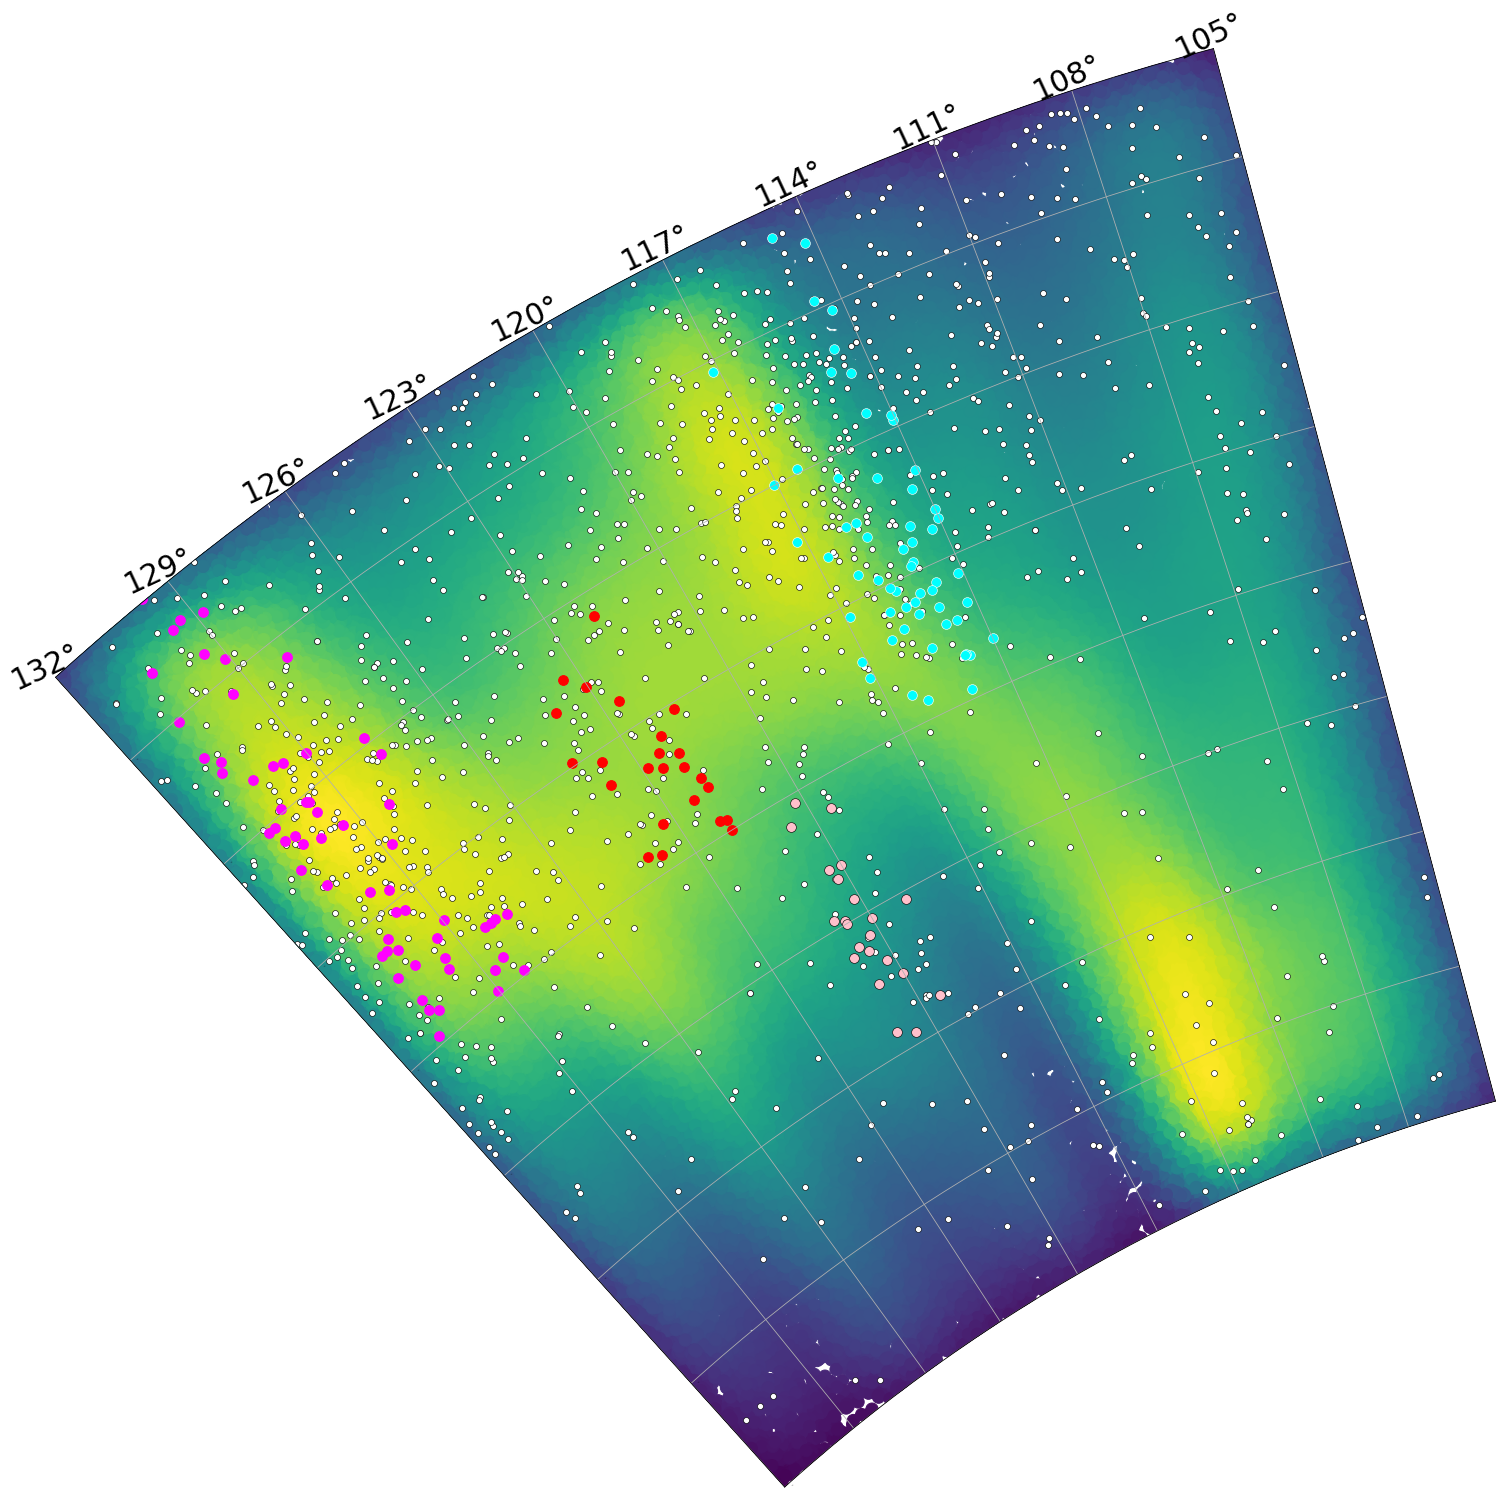

In [14]:
fig = plt.figure()    
ax3 = fig.add_axes([0.05, 0.4, 5, 5], polar=True)
ax3.scatter(peak_l, peak_d, c=z, s = 150)

ax3.scatter(alll, alld, s = 35, color = 'white',edgecolors='black',linewidth=0.6, label = 'All known OB type stars' )
ax3.scatter(all4, dlist4, color = 'pink', s = 95, edgecolors='black',linewidth=0.6, label = 'Cas OB4')
#ax3.scatter(all2, dlist2, color = 'yellow', s = 95, edgecolors='black', linewidth=0.6, label = 'Cas OB2')
ax3.scatter(all7, dlist7, color = 'red', s = 95, label = 'Cas OB7')
ax3.scatter(all5, dlist5, color = 'aqua', s = 95,edgecolors='white', linewidth=0.6, label = 'Cas OB5')
ax3.scatter(all8, dlist8, color = 'magenta', s = 95, label = 'Cas OB8')
#ax3.quiver(vel_l, vel_d, v_tan, v_rad, width = 0.003, scale=2500)
#ax3.contour(X, Y, Z, 8, cmap = 'inferno')#plasma, Reds
ax3.set_thetamax(105)
ax3.set_thetamin(132)
ax3.set_rorigin(-1600)
ax3.set_rmin(1500)
ax3.set_rmax(3450)

ax3.xaxis.set_tick_params(labelsize=30, rotation=25)
ax3.yaxis.set_tick_params(labelsize=1, rotation=20)
#plt.legend(prop = { "size": 20 }, loc = "lower left")